In [1]:
import src.utilidade as utilidade, src.zip as zip, src.video as video
import os, matplotlib.pyplot as plt, numpy as np
from tabulate import tabulate

# Virial 6.3: Choques elásticos com a mesma densidade

Fiz várias simulações com a mesma densidade para ver se é possível encontrar alguma estatística.

In [2]:
alvo = 'virial6.3'
destino = 'data/' + alvo
diretorio = destino + "/data"

In [3]:
zip.baixar_zip(f"https://www.ime.usp.br/~oapotalej/{alvo}.zip", f'{destino}.zip')
zip.descompactar(f'{destino}.zip', destino)
os.remove(destino + '.zip')

Arquivo salvo com data/virial6.3.zip
Extraído!


In [3]:
# Primeiro, vamos ler os arquivos
arquivos_antes = utilidade.ler_pastas_diretorio(diretorio)
densidades = list(arquivos_antes.keys())
densidades.sort()
arquivos = {dens: arquivos_antes[dens] for dens in densidades}

# Agora vamos calcular as informacoes das simulacoes
for densidade in arquivos:
    arquivo = arquivos[densidade]
    infos = utilidade.infos_simulacao(arquivo['pasta'])
    arquivo['infos'] = infos

Lendo a pasta 'data/virial6.3/data/20250823_003'... lido! (6.59s) informacoes calculadas! (4.72s)
Lendo a pasta 'data/virial6.3/data/20250823_002'... lido! (6.66s) informacoes calculadas! (4.22s)
Lendo a pasta 'data/virial6.3/data/20250822_001'... lido! (6.3s) informacoes calculadas! (4.2s)
Lendo a pasta 'data/virial6.3/data/20250822_002'... lido! (6.5s) informacoes calculadas! (4.23s)
Lendo a pasta 'data/virial6.3/data/20250823_001'... lido! (6.36s) informacoes calculadas! (4.22s)


Vamos olhar o que o sistema tem inicialmente...

In [4]:
tabela = []
for densidade in arquivos:
  infos = arquivos[densidade]['infos']
  tabela.append([infos['raio_meia_massa'][0], infos['tempo_dinamico'][0], infos['escapes'][0], infos['i0'], infos['inercia_central'][0]/2])
print(tabulate(tabela, headers=["RMH", "TD", "EJ(%)", "I0", "I0 Central"]))

     RMH        TD    EJ(%)        I0    I0 Central
--------  --------  -------  --------  ------------
0.586681  0.671784        0  0.844082      0.420781
0.378959  0.539914        0  0.843293      0.420726
0.979668  0.868096        0  0.842336      0.420194
1.19374   0.95826         0  0.842468      0.420317
0.926819  0.844357        0  0.842226      0.42037


Bom, o percentual de "ejetados" é zero. Isso significa que todos os corpos têm energia negativa. É legal observar que tanto o momento de inércia total de todos os casos é bastante semelhante; isso deve ser algo do processo de condicionar os valores iniciais, preciso fazer as contas.

O raio de meia massa (e o tempo dinâmico, consequentemente), por outro lado, são bastante diferentes de sorteio para sorteio. Por que será?

Com os dados em mãos, vamos ver o comportamento da segunda derivada do momento de inércia. Por experimentos anteriores, o esperado é que fique abaixo de zero mas pareça convergir para algo constante.

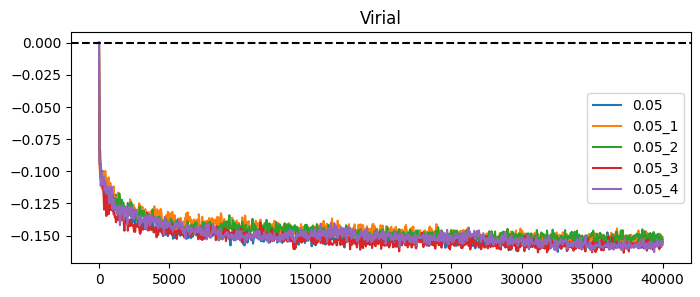

In [5]:
utilidade.fazer_figura(arquivos, 'virial', 'Virial', y_referencia=[0])

A partir de $t=3e4$ podemos observar um comportamento aproximado de reta (em média). Vejamos o que nos diz uma regressão linear.

  Dens.    Coef. Ang.
-------  ------------
  0.05   -2.38283e-07
  0.051  -3.10258e-07
  0.052  -2.65814e-07
  0.053  -2.60362e-07
  0.054  -2.64165e-07


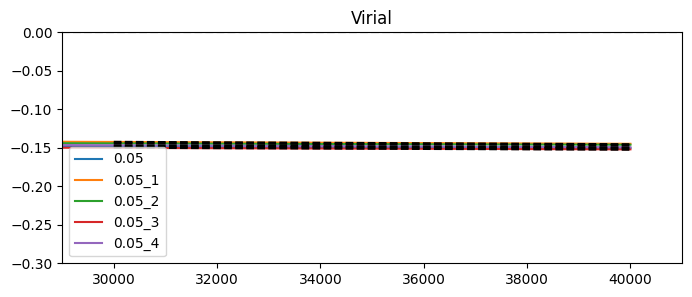

In [6]:
utilidade.fazer_figura(arquivos, 'virial_media', 'Virial', y_referencia=[0], plotar=False)
plt.ylim(-0.3, 0)

tabela = []
for densidade in arquivos:
  if float(densidade) == 0.02: continue
  ys = arquivos[densidade]['infos']['virial_media']
  xs = np.linspace(0, 40000, len(ys))

  x0 = 30000
  plt.xlim(x0-1e3, 41000)
  a, b = utilidade.reta_mmq_local(xs, ys, x0, k=int(x0 * 800/40000))

  xs = np.linspace(x0, 40000, 100)
  yx = (lambda x: a * x + b)(xs)
  plt.plot(xs, yx, c='black', linestyle='--')
  tabela.append([densidade, a])

print(tabulate(tabela, headers=["Dens.", "Coef. Ang."]))
plt.show()

Bom, é relativamente próximo de zero pela esquerda. Ainda é decrescente, mas muito pouco. Talvez isso se estabilize no futuro em algum momento...

Vejamos o que acontece no centro. Aqui estou considerando o centro como as partículas que têm energia total negativa, e as com energia não negativa são tidas como ejetadas.

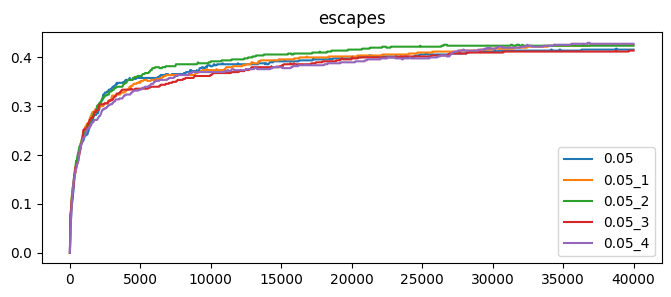

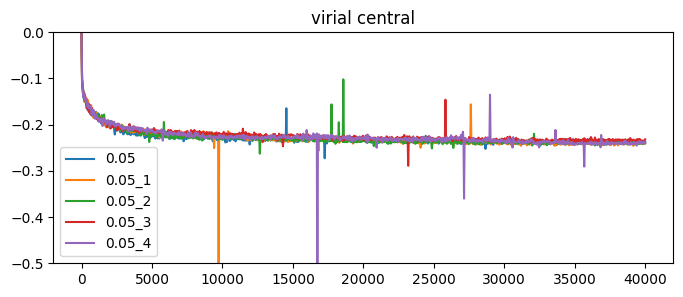

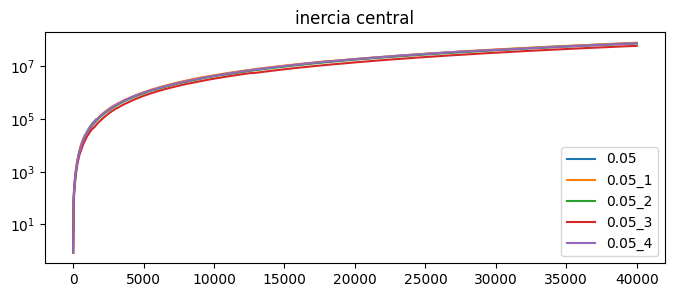

In [7]:
utilidade.fazer_figura(arquivos, 'escapes', 'escapes')

utilidade.fazer_figura(arquivos, 'virial_central', 'virial central', plotar=False)
plt.ylim(-0.5, 0)
plt.show()

utilidade.fazer_figura(arquivos, 'inercia_central', 'inercia central', plotar=False)
plt.yscale('log')
plt.show()

Bom, o comportamento foi parecido entre todas as simulações, isso é interessante. Para um raio fixo de $0.05$ em um problema de 500 corpos com massas $1/500$, temos 40% de "ejetados". Isso na verdade é uma contraparte do que podemos ver no virial; ora, se 60% dos corpos tem energia negativa, isso reflete em um desequilíbrio que pende $2T + V$ para baixo. Faz sentido...

Vamos olhar agora o raio de meia massa.

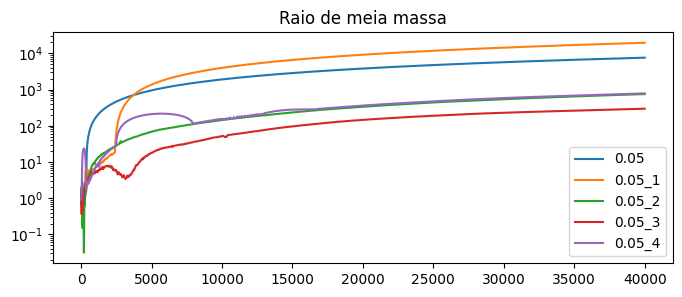

In [8]:
utilidade.fazer_figura(arquivos, 'raio_meia_massa', 'Raio de meia massa', plotar=False)
plt.yscale('log')
plt.show()

e fato, os sistemas evoluiram de forma drasticamente diferente olhando desse ponto de vista. O vermelho, por exemplo, atingiu um raio de meia massa de aproximadamente 100, apesar de também ter "ejetado" somente 40% das massas. O que isso significa?

É estranho pensar que um sistema com um raio de meia massa grande possa ter contribuições de corpos com energia não negativa, uma vez que 60% do sistema tem energia negativa, e como são massas iguais, 60% da massa deve estar com esses de energia negativa.

Isso significa então que mesmo os corpos com energia negativa estão se afastando bastante do centro - ou então, o mini-centro está se afastando rapidamente da origem. Vamos olhar o centro de massas do minicentro.

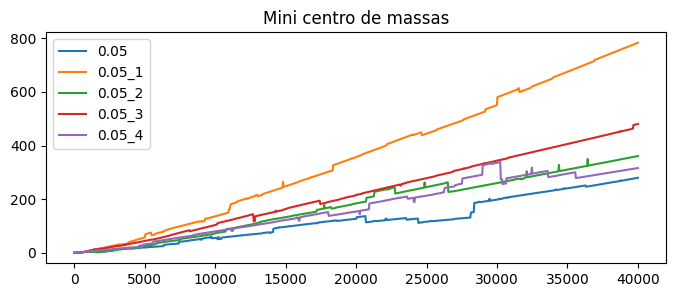

In [9]:
utilidade.fazer_figura(arquivos, 'centro_massas_minicentro', 'Mini centro de massas', plotar=False)
plt.show()

De fato, o mini centro de move bastante, mas não é o suficiente para explicar o grande raio de meia massa, já que não houve correspondência direta.

Um raio de meia massas relativo a esse centro pode ser interessante. Vejamos.

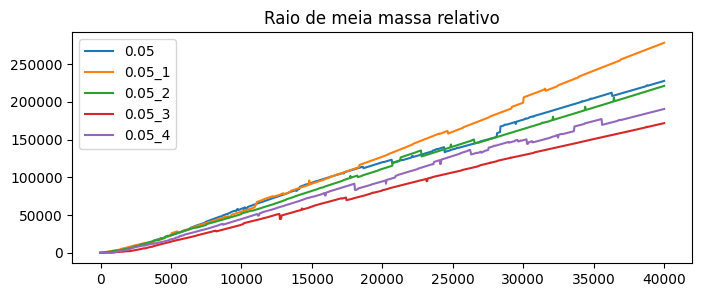

In [10]:
utilidade.fazer_figura(arquivos, 'raio_meia_massa_relativo', 'Raio de meia massa relativo')